In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re

os.chdir("C:\DataScience_DSC_640\MileStone\Data")

In [64]:
safety_travel_df = pd.read_excel("table_02_01_090322.xlsx" , sheet_name=5, header=1 , nrows = 48)
safety_travel_df.head(100)

,Transportation,1960,1965,1970,1975,1980,1985,1990,1991,1992,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,TOTAL fatalities,U,U,U,U,U,U,47298,44391,41947,...,35693.0,34691.0,34638.0,37368.0,39748.0,39364.0,38755.0,38425.0,40851.0,U
1,"Air, total",1286,1290,1456,1473,1382,1595,866,1039,988,...,450.0,429.0,442.0,406.0,408.0,347.0,395.0,452.0,349.0,U
2,U.S. air carrier a,499,261,146,124,1,526,39,62,33,...,0.0,9.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,U
3,Commuter carrier b,N,N,N,28,37,37,6,99,21,...,0.0,5.0,0.0,1.0,8.0,0.0,0.0,2.0,5.0,U
4,On-demand air taxi c,N,N,N,69,105,76,51,78,68,...,12.0,25.0,20.0,27.0,19.0,16.0,16.0,32.0,21.0,U
5,General aviation d,787,1029,1310,1252,1239,956,770,800,866,...,438.0,390.0,422.0,378.0,386.0,331.0,379.0,414.0,332.0,U
6,"Highway, total",36399,47089,52627,44525,51091,43825,44599,41508,39250,...,33782.0,32893.0,32744.0,35484.0,37806.0,37473.0,36835.0,36355.0,38824.0,U
7,Passenger car occupants,N,N,N,25929,27449,23212,24092,22385,21387,...,12361.0,12037.0,11947.0,12763.0,13508.0,13477.0,12888.0,12355.0,13472.0,U
8,Motorcyclists,790,1650,2280,3189,5144,4564,3244,2806,2395,...,4986.0,4692.0,4594.0,5029.0,5337.0,5226.0,5038.0,5044.0,5579.0,U
9,"Truck occupants e, light",N,N,N,4856,7486,6689,8601,8391,8098,...,9418.0,9186.0,9103.0,9878.0,10279.0,10186.0,9957.0,10017.0,10352.0,U


In [65]:
#Removing the years and focusing on concepts from 2010 and onf


fat_safty_df = safety_travel_df[["Transportation",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]]

In [66]:
fat_safty_df.head(5)

,Transportation,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,TOTAL fatalities,35040.0,34568.0,35693.0,34691.0,34638.0,37368.0,39748.0,39364.0,38755.0,38425.0,40851.0,U
1,"Air, total",477.0,499.0,450.0,429.0,442.0,406.0,408.0,347.0,395.0,452.0,349.0,U
2,U.S. air carrier a,2.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,U
3,Commuter carrier b,0.0,0.0,0.0,5.0,0.0,1.0,8.0,0.0,0.0,2.0,5.0,U
4,On-demand air taxi c,17.0,41.0,12.0,25.0,20.0,27.0,19.0,16.0,16.0,32.0,21.0,U


In [67]:
fat_safty_df = fat_safty_df.loc[fat_safty_df['Transportation'].str.contains('total')]
fat_safty_df

,Transportation,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,"Air, total",477.0,499.0,450.0,429.0,442.0,406.0,408.0,347.0,395.0,452.0,349.0,U
6,"Highway, total",32999.0,32479.0,33782.0,32893.0,32744.0,35484.0,37806.0,37473.0,36835.0,36355.0,38824.0,U
15,"Railroad, total g",735.0,681.0,669.0,702.0,767.0,749.0,761.0,817.0,794.0,855.0,743.0,890
20,"Transit, total i",224.0,227.0,265.0,273.0,240.0,251.0,259.0,249.0,260.0,268.0,289.0,322
24,"Water, total j",821.0,904.0,765.0,650.0,674.0,700.0,737.0,709.0,682.0,707.0,838.0,696
29,"Pipeline, total",22.0,13.0,12.0,9.0,19.0,11.0,16.0,7.0,7.0,11.0,15.0,13


In [68]:
fat_safty_df['Transportation'].index

Int64Index([1, 6, 15, 20, 24, 29], dtype='int64')

In [69]:
#Refactoring data to fit a more workable structure

#setting array 
refactored_data_struct = []

#Using month array to compare with month in index 
months =  [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,2019, 2020, 2021]
#Gives index of current row
for i in fat_safty_df['Transportation'].index:
    for mon in months:
        #Example 2010
        date = mon
        #saving values in array as a three layer array that can be converted into data frame
        refactored_data_struct.append([fat_safty_df['Transportation'][i],fat_safty_df[mon][i], date])
    
        
     
    
    

In [202]:
#refactored_data_struct

In [70]:

#Converting into a data frame
fat_safty_refactored = pd.DataFrame(refactored_data_struct, columns =['Transportation','Fatalities', 'Date'])

In [71]:
fat_safty_refactored.head(71)

,Transportation,Fatalities,Date
0,"Air, total",477.0,2010
1,"Air, total",499.0,2011
2,"Air, total",450.0,2012
3,"Air, total",429.0,2013
4,"Air, total",442.0,2014
...,...,...,...
66,"Pipeline, total",16.0,2016
67,"Pipeline, total",7.0,2017
68,"Pipeline, total",7.0,2018
69,"Pipeline, total",11.0,2019


In [75]:
#changing to more readiable values

fat_safty_refactored.loc[fat_safty_refactored['Transportation'] == 'Air, total', 'Transportation'] = 'Air'
fat_safty_refactored.loc[fat_safty_refactored['Transportation'] == 'Highway, total', 'Transportation'] = 'Highway'
fat_safty_refactored.loc[fat_safty_refactored['Transportation'] == 'Railroad, total g', 'Transportation'] = 'Railroad'
fat_safty_refactored.loc[fat_safty_refactored['Transportation'] == 'Transit, total i', 'Transportation'] = 'Transit'
fat_safty_refactored.loc[fat_safty_refactored['Transportation'] == 'Water, total j', 'Transportation'] = 'Water'


In [76]:
#removing dates
fat_safty_df = fat_safty_refactored.drop('Date', axis= 1).copy()

In [77]:
#In place of nan removing
fat_safty_df = fat_safty_df.replace(to_replace="U" , value= 0)

In [78]:
#Not interested in showing pipeline which amounts to zero percent
fat_safty_df = fat_safty_df[fat_safty_df["Transportation"].str.contains("Pipeline, total") == False]

<AxesSubplot:title={'center':'Transportation Fatalities in the Last 10 Years'}>

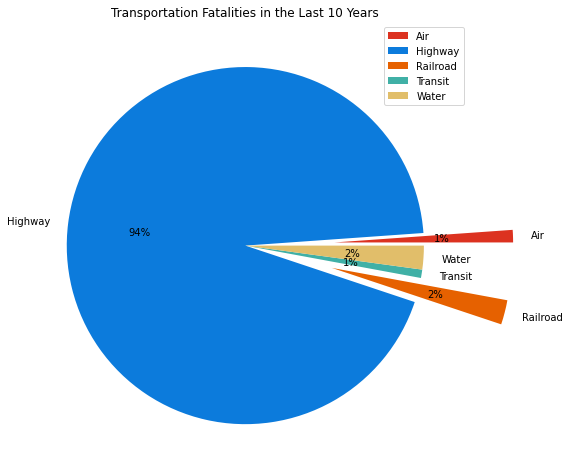

In [88]:
#Summing up all values and placing in pie chart 
val_explode = [.5, 0, 0.5, 0, 0]

col = ['#DC3220', '#0C7BDC','#E66100','#40B0A6', '#E1BE6A']

fat_safty_df.groupby(['Transportation']).sum().plot(kind='pie', y='Fatalities', ylabel= '', colors= col ,autopct='%1.0f%%', figsize=(8, 20), explode =val_explode,title="Transportation Fatalities in the Last 10 Years" )



In [55]:
us_travel_safty = pd.read_excel("table_02_09_102621.xlsx" ,  header=1 , nrows = 1)
us_travel_safty.head()


,Unnamed: 0,1960,1965,1970,1975,1980,1985,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Total fatalities,499,261,146,124,1,526,39,50,33,...,0,0,9,0,0,0,0,1,4,0


In [56]:
us_travel_safty = us_travel_safty.drop('Unnamed: 0', axis=1)

In [4]:
#num_columns = len(us_travel_safty.columns) - 1

In [57]:
refactored_date_fat = []

for col in us_travel_safty.columns:
    
    
    refactored_date_fat.append([col,us_travel_safty[col].values[0] ])


In [58]:
refactored_date_fat 

[[1960, 499],
 [1965, 261],
 [1970, 146],
 [1975, 124],
 [1980, 1],
 [1985, 526],
 [1990, 39],
 [1991, 50],
 [1992, 33],
 [1993, 1],
 [1994, 239],
 [1995, 168],
 [1996, 380],
 [1997, 8],
 [1998, 1],
 [1999, 12],
 [2000, 92],
 [2001, 531],
 [2002, 0],
 [2003, 22],
 [2004, 14],
 [2005, 22],
 [2006, 50],
 [2007, 1],
 [2008, 3],
 [2009, 52],
 [2010, 2],
 [2011, 0],
 [2012, 0],
 [2013, 9],
 [2014, 0],
 [2015, 0],
 [2016, 0],
 [2017, 0],
 [2018, 1],
 [2019, 4],
 [2020, 0]]

In [59]:

#Converting into a data frame
fatalities_airline_df = pd.DataFrame(refactored_date_fat, columns =[ 'Date','Fatalities'])

<AxesSubplot:title={'center':'Airline Fatalities in the last 40 Years'}, xlabel='Date', ylabel='Fatalities'>

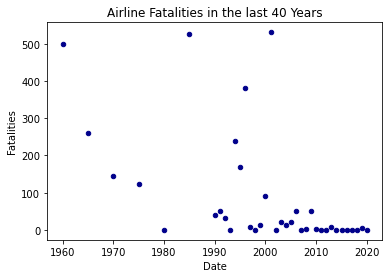

In [61]:
fatalities_airline_df.plot.scatter(x='Date',y='Fatalities',c='DarkBlue' , title="Airline Fatalities in the last 40 Years")

In [16]:
#CO2 DATA

co2_countries_df = pd.read_csv("CO2-by-source.csv")


In [17]:
co2_countries_df.head()

,Entity,Code,Year,Annual CO2 emissions from other industry (zero filled),Annual CO2 emissions from flaring (zero filled),Annual CO2 emissions from cement (zero filled),Annual CO2 emissions from gas (zero filled),Annual CO2 emissions from oil (zero filled),Annual CO2 emissions from coal (zero filled)
0,Afghanistan,AFG,1750,0,0,0,0,0,0
1,Afghanistan,AFG,1751,0,0,0,0,0,0
2,Afghanistan,AFG,1752,0,0,0,0,0,0
3,Afghanistan,AFG,1753,0,0,0,0,0,0
4,Afghanistan,AFG,1754,0,0,0,0,0,0


In [18]:
co2_countries_df = co2_countries_df[co2_countries_df["Code"] == 'USA']

In [19]:
co2_countries_df.head()

,Entity,Code,Year,Annual CO2 emissions from other industry (zero filled),Annual CO2 emissions from flaring (zero filled),Annual CO2 emissions from cement (zero filled),Annual CO2 emissions from gas (zero filled),Annual CO2 emissions from oil (zero filled),Annual CO2 emissions from coal (zero filled)
63685,United States,USA,1750,0,0,0,0,0,0
63686,United States,USA,1751,0,0,0,0,0,0
63687,United States,USA,1752,0,0,0,0,0,0
63688,United States,USA,1753,0,0,0,0,0,0
63689,United States,USA,1754,0,0,0,0,0,0


In [20]:
co2_countries_df = co2_countries_df.drop(["Annual CO2 emissions from flaring (zero filled)", "Annual CO2 emissions from flaring (zero filled)", "Annual CO2 emissions from coal (zero filled)", "Annual CO2 emissions from cement (zero filled)"], axis = 1)

In [21]:
co2_countries_df.head()

,Entity,Code,Year,Annual CO2 emissions from other industry (zero filled),Annual CO2 emissions from gas (zero filled),Annual CO2 emissions from oil (zero filled)
63685,United States,USA,1750,0,0,0
63686,United States,USA,1751,0,0,0
63687,United States,USA,1752,0,0,0
63688,United States,USA,1753,0,0,0
63689,United States,USA,1754,0,0,0


In [22]:
co2_countries_df = co2_countries_df.rename(columns={ "Annual CO2 emissions from other industry (zero filled)" : "Other Industries" , "Annual CO2 emissions from gas (zero filled)" : "Gas", "Annual CO2 emissions from oil (zero filled)" : "Oil"})

In [23]:
co2_countries_df.head()

,Entity,Code,Year,Other Industries,Gas,Oil
63685,United States,USA,1750,0,0,0
63686,United States,USA,1751,0,0,0
63687,United States,USA,1752,0,0,0
63688,United States,USA,1753,0,0,0
63689,United States,USA,1754,0,0,0


<AxesSubplot:title={'center':'United States Carbon Emissions by Fuel Type'}, xlabel='Year', ylabel='Frequency'>

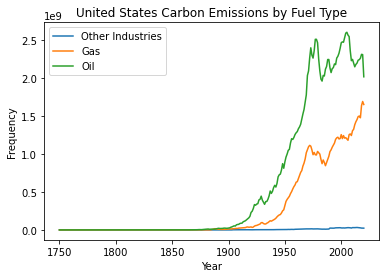

<Figure size 720x1440 with 0 Axes>

In [62]:
axes = plt.gca()



plt.title("United States Carbon Emissions by Fuel Type")
plt.ylabel("Frequency")
plt.figure(figsize=(10, 20))
co2_countries_df.plot(kind='line', x='Year', y='Other Industries', ax=axes)
co2_countries_df.plot(kind='line', x='Year', y='Gas', ax=axes)
co2_countries_df.plot(kind='line', x='Year', y='Oil', ax=axes)


